In [1]:

import json
import hashlib

import base64
import openai
from loguru import logger
import os
from IPython.display import Image, display
from PIL import Image as PILImage
from pathlib import Path

logger.remove()  # Remove the default handler that logs to stderr
logger.add("Apology.log", format="{time} {level} {message}", level="DEBUG", rotation="1 MB", compression="zip")

openai.api_key = os.environ['OPENAI_API_KEY']

class Illustrator:
    
    # Define the directories for original and compressed images
    original_img_dir = Path("imgs/original")
    compressed_img_dir = Path("imgs/compressed")
    prompt_map_file = Path("imgs/prompt_map.json")  # File to store the map between filenames and prompts

    # Create the directories if they don't exist
    original_img_dir.mkdir(parents=True, exist_ok=True)
    compressed_img_dir.mkdir(parents=True, exist_ok=True)
    prompt_map_file.touch(exist_ok=True)  # Create the file if it doesn't exist

    def __init__(self):
        # Load the prompt map from file
        try:
            with open(self.prompt_map_file, "r") as f:
                self.prompt_map = json.load(f)
        except (json.JSONDecodeError, FileNotFoundError):
            self.prompt_map = {}

    def __call__(self, prompt):
        return self.generate_image(prompt)
        
    # Used in the generated notebook
    def generate_image(self, prompt):
        # Generate a hash from the prompt for the filename
        prompt_hash = hashlib.sha256(prompt.encode()).hexdigest()
        original_filename = Illustrator.original_img_dir / f"{prompt_hash}.png"
        compressed_filename = Illustrator.compressed_img_dir / f"{prompt_hash}.jpg"

        # Save the mapping between the hash and the prompt
        if prompt_hash not in self.prompt_map:
            self.prompt_map[prompt_hash] = prompt
            self._save_prompt_map()

        # Check if the compressed file already exists
        if compressed_filename.exists():
            logger.info(f"File '{compressed_filename}' already exists. Skipping image generation.")
            return compressed_filename
        elif prompt.strip() == "":
            return None # No prompt provided
        elif original_filename.exists() and not compressed_filename.exists():
            logger.info(f"File '{original_filename}' already exists.  Skipping image generation. Compressing image.")
            return compress_image(original_filename, compressed_filename)
        else:
            logger.info(f"Generating image for prompt: {prompt}")
            # Generate the image using OpenAI's DALL-E
            img = client.images.generate(
                model="gpt-image-1",
                prompt=f"{prompt}",
                n=1,
                size="1024x1024",
                # response_format="b64_json",
            )
           
            image_bytes = base64.b64decode(img.data[0].b64_json)
            with open(original_filename, "wb") as f:
                f.write(image_bytes)
                
            return compress_image(original_filename, compressed_filename)

    def _save_prompt_map(self):
        """Save the prompt map to a file."""
        with open(self.prompt_map_file, "w") as f:
            json.dump(self.prompt_map, f, indent=4)


def display_image(filename):
    """Display the image in the notebook. filename is the path to the image and also the prompt"""
    if filename is None:
        return 'Did you enter a prompt?'
    else:
        # Display the image
        display(Image(filename, width=400, height=400))


def compress_image(original_filename, compressed_filename):
    # Check if the original file exists
    if not os.path.exists(original_filename):
        logger.error(f"Original file '{original_filename}' does not exist.")
        raise FileNotFoundError(f"Original file '{original_filename}' does not exist.")

    with PILImage.open(original_filename) as img:
        img.save(compressed_filename, "JPEG", quality=85, optimize=True)

    logger.info(f"Compressed image saved to '{compressed_filename}'")
    return compressed_filename


client = openai.OpenAI()
illustrator = Illustrator()


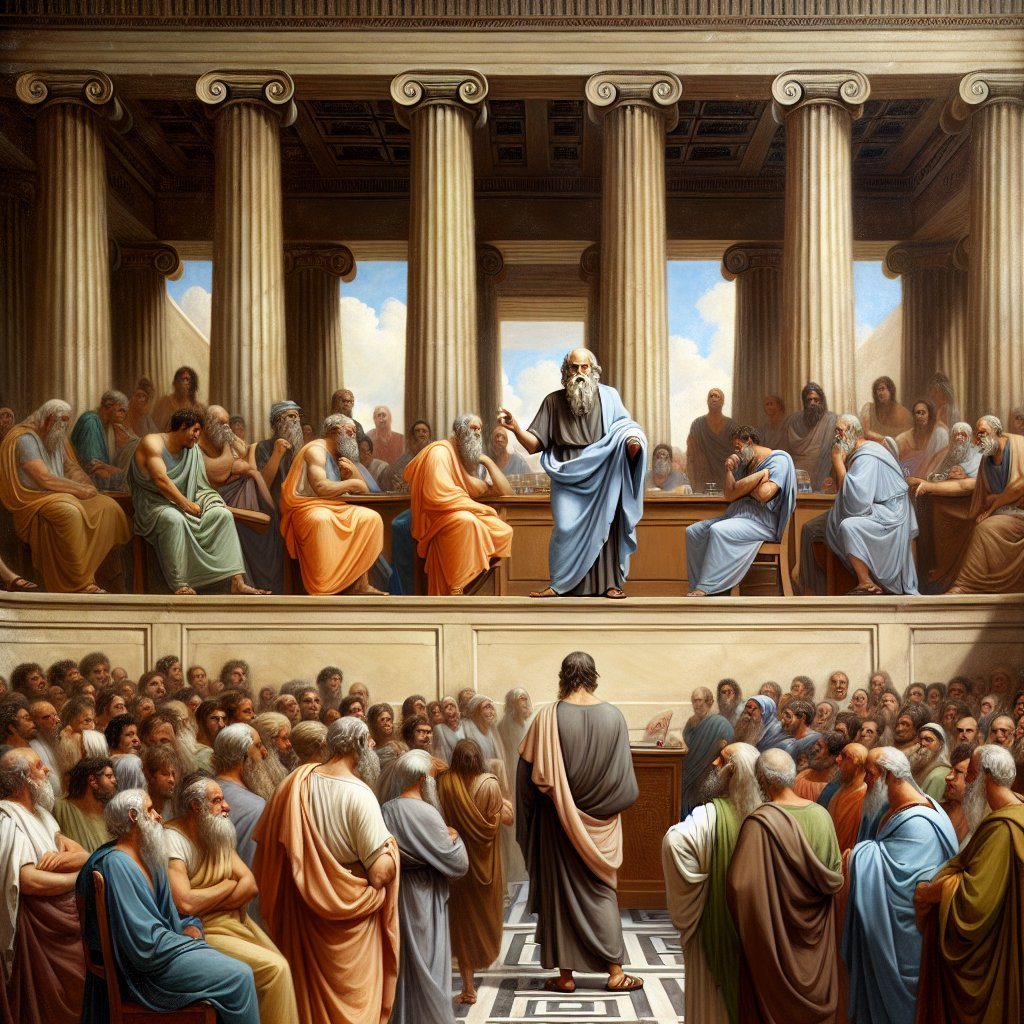

In [2]:
# Generate image for text below
display_image(illustrator('Create a neoclassical painting of the opening scene of The Apology by Plato.'))


How you, O Athenians, have been affected by my accusers, I cannot tell;
but I know that they almost made me forget who I was—so persuasively
did they speak; and yet they have hardly uttered a word of truth. But
of the many falsehoods told by them, there was one which quite amazed
me;—I mean when they said that you should be upon your guard and not
allow yourselves to be deceived by the force of my eloquence. To say
this, when they were certain to be detected as soon as I opened my lips
and proved myself to be anything but a great speaker, did indeed appear
to me most shameless—unless by the force of eloquence they mean the
force of truth; for if such is their meaning, I admit that I am
eloquent. But in how different a way from theirs! Well, as I was
saying, they have scarcely spoken the truth at all; but from me you
shall hear the whole truth: not, however, delivered after their manner
in a set oration duly ornamented with words and phrases. No, by heaven!
but I shall use the words and arguments which occur to me at the
moment; for I am confident in the justice of my cause (Or, I am certain
that I am right in taking this course.): at my time of life I ought not
to be appearing before you, O men of Athens, in the character of a
juvenile orator—let no one expect it of me. And I must beg of you to
grant me a favour:—If I defend myself in my accustomed manner, and you
hear me using the words which I have been in the habit of using in the
agora, at the tables of the money-changers, or anywhere else, I would
ask you not to be surprised, and not to interrupt me on this account.
For I am more than seventy years of age, and appearing now for the
first time in a court of law, I am quite a stranger to the language of
the place; and therefore I would have you regard me as if I were really
a stranger, whom you would excuse if he spoke in his native tongue, and
after the fashion of his country:—Am I making an unfair request of you?
Never mind the manner, which may or may not be good; but think only of
the truth of my words, and give heed to that: let the speaker speak
truly and the judge decide justly.

**Note:** Add your notes here.

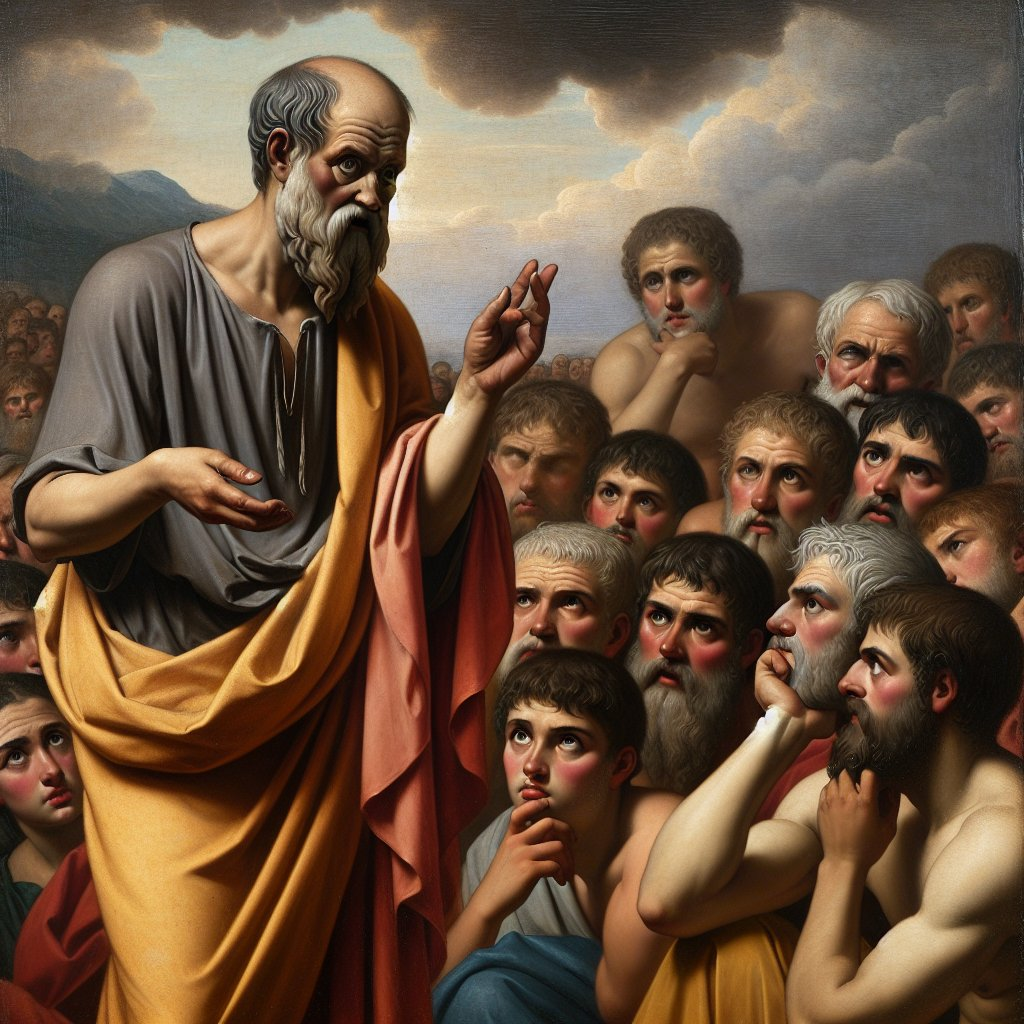

In [4]:
# Generate image for text below
display_image(illustrator('Create a neoclassical painting from of The Apology by Plato. The scene is when Socrates first describes his first accuser:  "who began when you were children, and took possession of your minds with their falsehoods, telling of one Socrates, a wise man, who speculated about the heaven above, and searched into the earth beneath, and made the worse appear the better cause. The disseminators of this tale are the accusers whom I dread; for their hearers are apt to fancy that such enquirers do not believe in the existence of the gods. "'))


And first, I have to reply to the older charges and to my first
accusers, and then I will go on to the later ones. For of old I have
had many accusers, who have accused me falsely to you during many
years; and I am more afraid of them than of Anytus and his associates,
who are dangerous, too, in their own way. But far more dangerous are
the others, who began when you were children, and took possession of
your minds with their falsehoods, telling of one Socrates, a wise man,
who speculated about the heaven above, and searched into the earth
beneath, and made the worse appear the better cause. The disseminators
of this tale are the accusers whom I dread; for their hearers are apt
to fancy that such enquirers do not believe in the existence of the
gods. And they are many, and their charges against me are of ancient
date, and they were made by them in the days when you were more
impressible than you are now—in childhood, or it may have been in
youth—and the cause when heard went by default, for there was none to
answer. And hardest of all, I do not know and cannot tell the names of
my accusers; unless in the chance case of a Comic poet. All who from
envy and malice have persuaded you—some of them having first convinced
themselves—all this class of men are most difficult to deal with; for I
cannot have them up here, and cross-examine them, and therefore I must
simply fight with shadows in my own defence, and argue when there is no
one who answers. I will ask you then to assume with me, as I was
saying, that my opponents are of two kinds; one recent, the other
ancient: and I hope that you will see the propriety of my answering the
latter first, for these accusations you heard long before the others,
and much oftener.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


Well, then, I must make my defence, and endeavour to clear away in a
short time, a slander which has lasted a long time. May I succeed, if
to succeed be for my good and yours, or likely to avail me in my cause!
The task is not an easy one; I quite understand the nature of it. And
so leaving the event with God, in obedience to the law I will now make
my defence.

**Note:** Add your notes here.

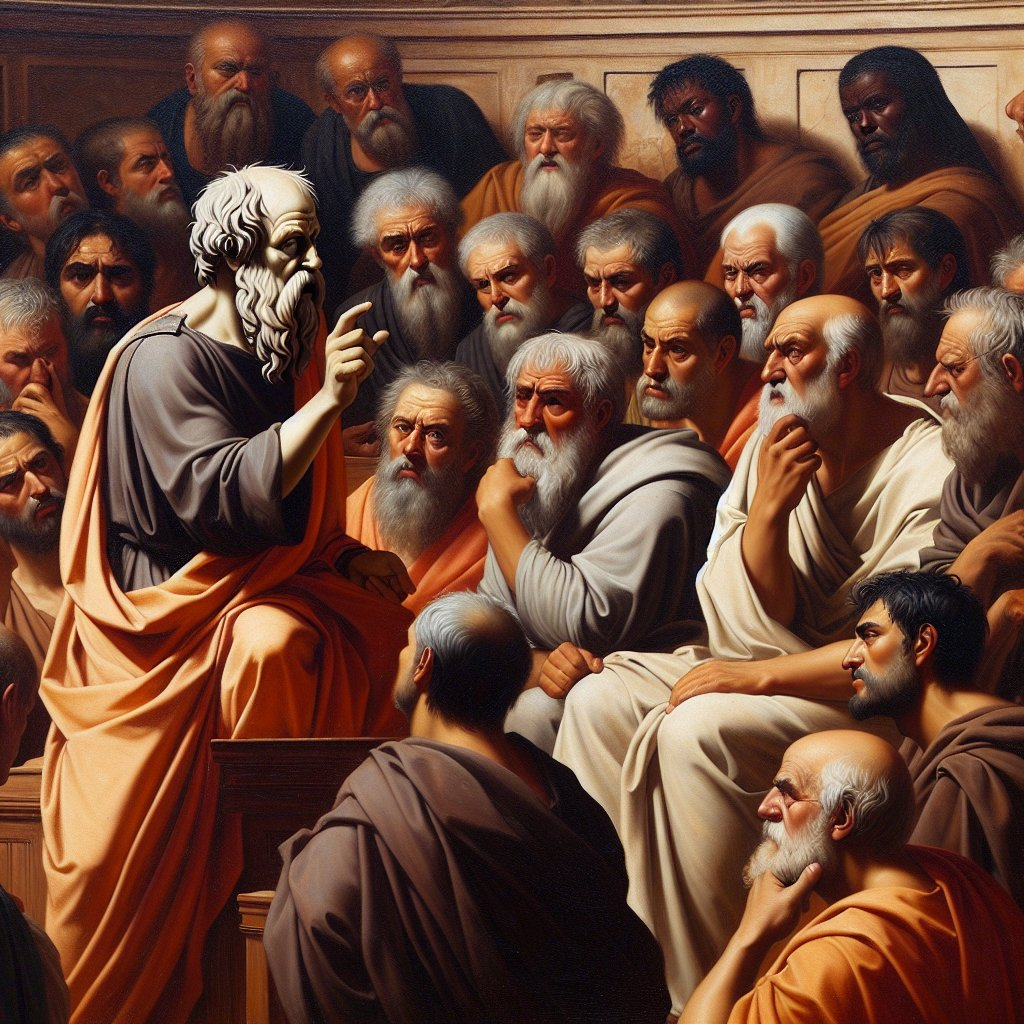

In [6]:
# Generate image for text below
display_image(illustrator('Create a neoclassical painting from of The Apology by Plato. The scene is when Socrates appeals to the jury, asking them to consider the truth of his words and the falsehood of the accusations against him: " Speak then, you who have heard me, and tell your neighbours whether any of you have ever known me hold forth in few words or in many upon such matters...You hear their answer. And from what they say of this part of the charge you will be able to judge of the truth of the rest."'))


I will begin at the beginning, and ask what is the accusation which has
given rise to the slander of me, and in fact has encouraged Meletus to
proof this charge against me. Well, what do the slanderers say? They
shall be my prosecutors, and I will sum up their words in an affidavit:
“Socrates is an evil-doer, and a curious person, who searches into
things under the earth and in heaven, and he makes the worse appear the
better cause; and he teaches the aforesaid doctrines to others.” Such
is the nature of the accusation: it is just what you have yourselves
seen in the comedy of Aristophanes (Aristoph., Clouds.), who has
introduced a man whom he calls Socrates, going about and saying that he
walks in air, and talking a deal of nonsense concerning matters of
which I do not pretend to know either much or little—not that I mean to
speak disparagingly of any one who is a student of natural philosophy.
I should be very sorry if Meletus could bring so grave a charge against
me. But the simple truth is, O Athenians, that I have nothing to do
with physical speculations. Very many of those here present are
witnesses to the truth of this, and to them I appeal. Speak then, you
who have heard me, and tell your neighbours whether any of you have
ever known me hold forth in few words or in many upon such
matters...You hear their answer. And from what they say of this part of
the charge you will be able to judge of the truth of the rest.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


As little foundation is there for the report that I am a teacher, and
take money; this accusation has no more truth in it than the other.
Although, if a man were really able to instruct mankind, to receive
money for giving instruction would, in my opinion, be an honour to him.
There is Gorgias of Leontium, and Prodicus of Ceos, and Hippias of
Elis, who go the round of the cities, and are able to persuade the
young men to leave their own citizens by whom they might be taught for
nothing, and come to them whom they not only pay, but are thankful if
they may be allowed to pay them. There is at this time a Parian
philosopher residing in Athens, of whom I have heard; and I came to
hear of him in this way:—I came across a man who has spent a world of
money on the Sophists, Callias, the son of Hipponicus, and knowing that
he had sons, I asked him: “Callias,” I said, “if your two sons were
foals or calves, there would be no difficulty in finding some one to
put over them; we should hire a trainer of horses, or a farmer
probably, who would improve and perfect them in their own proper virtue
and excellence; but as they are human beings, whom are you thinking of
placing over them? Is there any one who understands human and political
virtue? You must have thought about the matter, for you have sons; is
there any one?” “There is,” he said. “Who is he?” said I; “and of what
country? and what does he charge?” “Evenus the Parian,” he replied; “he
is the man, and his charge is five minæ.” Happy is Evenus, I said to
myself, if he really has this wisdom, and teaches at such a moderate
charge. Had I the same, I should have been very proud and conceited;
but the truth is that I have no knowledge of the kind.

**Note:** Add your notes here.

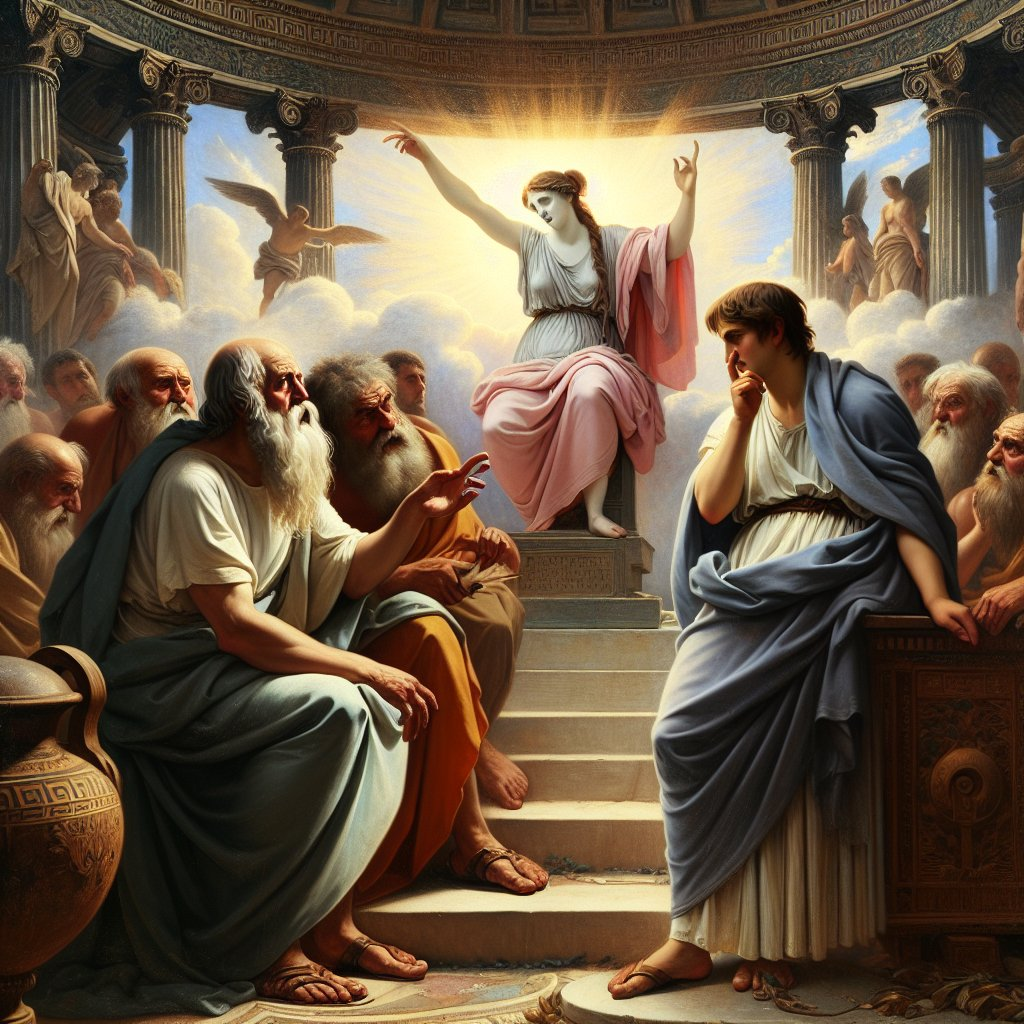

In [7]:
# Generate image for text below
display_image(illustrator('Create a neoclassical painting from of The Apology by Plato. The scene is the Oracle of Delphi telling Chaerphon no man is wiser than Socrates.'))


I dare say, Athenians, that some one among you will reply, “Yes,
Socrates, but what is the origin of these accusations which are brought
against you; there must have been something strange which you have been
doing? All these rumours and this talk about you would never have
arisen if you had been like other men: tell us, then, what is the cause
of them, for we should be sorry to judge hastily of you.” Now I regard
this as a fair challenge, and I will endeavour to explain to you the
reason why I am called wise and have such an evil fame. Please to
attend then. And although some of you may think that I am joking, I
declare that I will tell you the entire truth. Men of Athens, this
reputation of mine has come of a certain sort of wisdom which I
possess. If you ask me what kind of wisdom, I reply, wisdom such as may
perhaps be attained by man, for to that extent I am inclined to believe
that I am wise; whereas the persons of whom I was speaking have a
superhuman wisdom which I may fail to describe, because I have it not
myself; and he who says that I have, speaks falsely, and is taking away
my character. And here, O men of Athens, I must beg you not to
interrupt me, even if I seem to say something extravagant. For the word
which I will speak is not mine. I will refer you to a witness who is
worthy of credit; that witness shall be the God of Delphi—he will tell
you about my wisdom, if I have any, and of what sort it is. You must
have known Chaerephon; he was early a friend of mine, and also a friend
of yours, for he shared in the recent exile of the people, and returned
with you. Well, Chaerephon, as you know, was very impetuous in all his
doings, and he went to Delphi and boldly asked the oracle to tell him
whether—as I was saying, I must beg you not to interrupt—he asked the
oracle to tell him whether anyone was wiser than I was, and the Pythian
prophetess answered, that there was no man wiser. Chaerephon is dead
himself; but his brother, who is in court, will confirm the truth of
what I am saying.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


Why do I mention this? Because I am going to explain to you why I have
such an evil name. When I heard the answer, I said to myself, What can
the god mean? and what is the interpretation of his riddle? for I know
that I have no wisdom, small or great. What then can he mean when he
says that I am the wisest of men? And yet he is a god, and cannot lie;
that would be against his nature. After long consideration, I thought
of a method of trying the question. I reflected that if I could only
find a man wiser than myself, then I might go to the god with a
refutation in my hand. I should say to him, “Here is a man who is wiser
than I am; but you said that I was the wisest.” Accordingly I went to
one who had the reputation of wisdom, and observed him—his name I need
not mention; he was a politician whom I selected for examination—and
the result was as follows: When I began to talk with him, I could not
help thinking that he was not really wise, although he was thought wise
by many, and still wiser by himself; and thereupon I tried to explain
to him that he thought himself wise, but was not really wise; and the
consequence was that he hated me, and his enmity was shared by several
who were present and heard me. So I left him, saying to myself, as I
went away: Well, although I do not suppose that either of us knows
anything really beautiful and good, I am better off than he is,—for he
knows nothing, and thinks that he knows; I neither know nor think that
I know. In this latter particular, then, I seem to have slightly the
advantage of him. Then I went to another who had still higher
pretensions to wisdom, and my conclusion was exactly the same.
Whereupon I made another enemy of him, and of many others besides him.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


Then I went to one man after another, being not unconscious of the
enmity which I provoked, and I lamented and feared this: but necessity
was laid upon me,—the word of God, I thought, ought to be considered
first. And I said to myself, Go I must to all who appear to know, and
find out the meaning of the oracle. And I swear to you, Athenians, by
the dog I swear!—for I must tell you the truth—the result of my mission
was just this: I found that the men most in repute were all but the
most foolish; and that others less esteemed were really wiser and
better. I will tell you the tale of my wanderings and of the
“Herculean” labours, as I may call them, which I endured only to find
at last the oracle irrefutable. After the politicians, I went to the
poets; tragic, dithyrambic, and all sorts. And there, I said to myself,
you will be instantly detected; now you will find out that you are more
ignorant than they are. Accordingly, I took them some of the most
elaborate passages in their own writings, and asked what was the
meaning of them—thinking that they would teach me something. Will you
believe me? I am almost ashamed to confess the truth, but I must say
that there is hardly a person present who would not have talked better
about their poetry than they did themselves. Then I knew that not by
wisdom do poets write poetry, but by a sort of genius and inspiration;
they are like diviners or soothsayers who also say many fine things,
but do not understand the meaning of them. The poets appeared to me to
be much in the same case; and I further observed that upon the strength
of their poetry they believed themselves to be the wisest of men in
other things in which they were not wise. So I departed, conceiving
myself to be superior to them for the same reason that I was superior
to the politicians.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


At last I went to the artisans. I was conscious that I knew nothing at
all, as I may say, and I was sure that they knew many fine things; and
here I was not mistaken, for they did know many things of which I was
ignorant, and in this they certainly were wiser than I was. But I
observed that even the good artisans fell into the same error as the
poets;—because they were good workmen they thought that they also knew
all sorts of high matters, and this defect in them overshadowed their
wisdom; and therefore I asked myself on behalf of the oracle, whether I
would like to be as I was, neither having their knowledge nor their
ignorance, or like them in both; and I made answer to myself and to the
oracle that I was better off as I was.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


This inquisition has led to my having many enemies of the worst and
most dangerous kind, and has given occasion also to many calumnies. And
I am called wise, for my hearers always imagine that I myself possess
the wisdom which I find wanting in others: but the truth is, O men of
Athens, that God only is wise; and by his answer he intends to show
that the wisdom of men is worth little or nothing; he is not speaking
of Socrates, he is only using my name by way of illustration, as if he
said, He, O men, is the wisest, who, like Socrates, knows that his
wisdom is in truth worth nothing. And so I go about the world, obedient
to the god, and search and make enquiry into the wisdom of any one,
whether citizen or stranger, who appears to be wise; and if he is not
wise, then in vindication of the oracle I show him that he is not wise;
and my occupation quite absorbs me, and I have no time to give either
to any public matter of interest or to any concern of my own, but I am
in utter poverty by reason of my devotion to the god.

**Note:** Add your notes here.

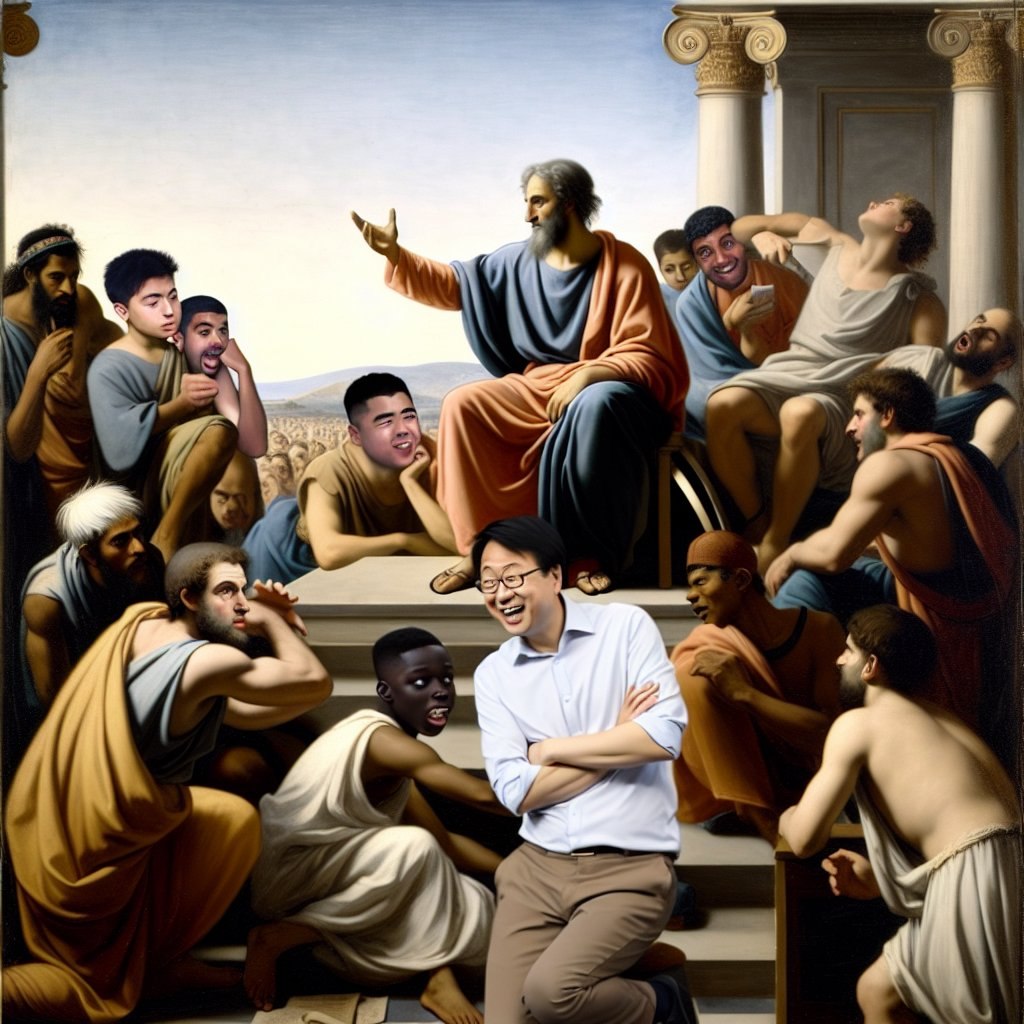

In [11]:
# Generate image for text below
display_image(illustrator('My prompt has full detail so no need to add more: Create a neoclassical painting set in ancient Athens. The foreground is a man engaged in dialogue with a poet, politician, and a labourer who are annoyed at the man. In the background of the scene are young well dressed boys laughing and pointing at the foreground.'))


There is another thing:—young men of the richer classes, who have not
much to do, come about me of their own accord; they like to hear the
pretenders examined, and they often imitate me, and proceed to examine
others; there are plenty of persons, as they quickly discover, who
think that they know something, but really know little or nothing; and
then those who are examined by them instead of being angry with
themselves are angry with me: This confounded Socrates, they say; this
villainous misleader of youth!—and then if somebody asks them, Why,
what evil does he practise or teach? they do not know, and cannot tell;
but in order that they may not appear to be at a loss, they repeat the
ready-made charges which are used against all philosophers about
teaching things up in the clouds and under the earth, and having no
gods, and making the worse appear the better cause; for they do not
like to confess that their pretence of knowledge has been
detected—which is the truth; and as they are numerous and ambitious and
energetic, and are drawn up in battle array and have persuasive
tongues, they have filled your ears with their loud and inveterate
calumnies. And this is the reason why my three accusers, Meletus and
Anytus and Lycon, have set upon me; Meletus, who has a quarrel with me
on behalf of the poets; Anytus, on behalf of the craftsmen and
politicians; Lycon, on behalf of the rhetoricians: and as I said at the
beginning, I cannot expect to get rid of such a mass of calumny all in
a moment. And this, O men of Athens, is the truth and the whole truth;
I have concealed nothing, I have dissembled nothing. And yet, I know
that my plainness of speech makes them hate me, and what is their
hatred but a proof that I am speaking the truth?—Hence has arisen the
prejudice against me; and this is the reason of it, as you will find
out either in this or in any future enquiry.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


I have said enough in my defence against the first class of my
accusers; I turn to the second class. They are headed by Meletus, that
good man and true lover of his country, as he calls himself. Against
these, too, I must try to make a defence:—Let their affidavit be read:
it contains something of this kind: It says that Socrates is a doer of
evil, who corrupts the youth; and who does not believe in the gods of
the state, but has other new divinities of his own. Such is the charge;
and now let us examine the particular counts. He says that I am a doer
of evil, and corrupt the youth; but I say, O men of Athens, that
Meletus is a doer of evil, in that he pretends to be in earnest when he
is only in jest, and is so eager to bring men to trial from a pretended
zeal and interest about matters in which he really never had the
smallest interest. And the truth of this I will endeavour to prove to
you.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


Come hither, Meletus, and let me ask a question of you. You think a
great deal about the improvement of youth? -Yes, I do.
Tell the judges, then, who is their improver; for you must know, as you
have taken the pains to discover their corrupter, and are citing and
accusing me before them. Speak, then, and tell the judges who their
improver is.—Observe, Meletus, that you are silent, and have nothing to
say. But is not this rather disgraceful, and a very considerable proof
of what I was saying, that you have no interest in the matter? Speak
up, friend, and tell us who their improver is. -The laws.
But that, my good sir, is not my meaning. I want to know who the person
is, who, in the first place, knows the laws. -The judges, Socrates, who are present in court.
What, do you mean to say, Meletus, that they are able to instruct and
improve youth? -Certainly they are.
What, all of them, or some only and not others? -All of them.
By the goddess Here, that is good news! There are plenty of improvers,
then. And what do you say of the audience,—do they improve them? -Yes, they do.
And the senators? -Yes, the senators improve them.
But perhaps the members of the assembly corrupt them?—or do they too
improve them? -They improve them.
Then every Athenian improves and elevates them; all with the exception
of myself; and I alone am their corrupter? Is that what you affirm? -That is what I stoutly affirm.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


I am very unfortunate if you are right. But suppose I ask you a
question: How about horses? Does one man do them harm and all the world
good? Is not the exact opposite the truth? One man is able to do them
good, or at least not many;—the trainer of horses, that is to say, does
them good, and others who have to do with them rather injure them? Is
not that true, Meletus, of horses, or of any other animals? Most
assuredly it is; whether you and Anytus say yes or no. Happy indeed
would be the condition of youth if they had one corrupter only, and all
the rest of the world were their improvers. But you, Meletus, have
sufficiently shown that you never had a thought about the young: your
carelessness is seen in your not caring about the very things which you
bring against me.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


And now, Meletus, I will ask you another question—by Zeus I will: Which
is better, to live among bad citizens, or among good ones? Answer,
friend, I say; the question is one which may be easily answered. Do not
the good do their neighbours good, and the bad do them evil? -Certainly.
And is there anyone who would rather be injured than benefited by those
who live with him? Answer, my good friend, the law requires you to
answer—does any one like to be injured? -Certainly not.
And when you accuse me of corrupting and deteriorating the youth, do
you allege that I corrupt them intentionally or unintentionally? -Intentionally, I say.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


But you have just admitted that the good do their neighbours good, and
the evil do them evil. Now, is that a truth which your superior wisdom
has recognized thus early in life, and am I, at my age, in such
darkness and ignorance as not to know that if a man with whom I have to
live is corrupted by me, I am very likely to be harmed by him; and yet
I corrupt him, and intentionally, too—so you say, although neither I
nor any other human being is ever likely to be convinced by you. But
either I do not corrupt them, or I corrupt them unintentionally; and on
either view of the case you lie. If my offence is unintentional, the
law has no cognizance of unintentional offences: you ought to have
taken me privately, and warned and admonished me; for if I had been
better advised, I should have left off doing what I only did
unintentionally—no doubt I should; but you would have nothing to say to
me and refused to teach me. And now you bring me up in this court,
which is a place not of instruction, but of punishment.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


It will be very clear to you, Athenians, as I was saying, that Meletus
has no care at all, great or small, about the matter. But still I
should like to know, Meletus, in what I am affirmed to corrupt the
young. I suppose you mean, as I infer from your indictment, that I
teach them not to acknowledge the gods which the state acknowledges,
but some other new divinities or spiritual agencies in their stead.
These are the lessons by which I corrupt the youth, as you say. -Yes, that I say emphatically.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


Then, by the gods, Meletus, of whom we are speaking, tell me and the
court, in somewhat plainer terms, what you mean! for I do not as yet
understand whether you affirm that I teach other men to acknowledge
some gods, and therefore that I do believe in gods, and am not an
entire atheist—this you do not lay to my charge,—but only you say that
they are not the same gods which the city recognizes—the charge is that
they are different gods. Or, do you mean that I am an atheist simply,
and a teacher of atheism? -I mean the latter—that you are a complete atheist.
What an extraordinary statement! Why do you think so, Meletus? Do you
mean that I do not believe in the godhead of the sun or moon, like
other men? -I assure you, judges, that he does not: for he says that the sun is
stone, and the moon earth.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


Friend Meletus, you think that you are accusing Anaxagoras: and you
have but a bad opinion of the judges, if you fancy them illiterate to
such a degree as not to know that these doctrines are found in the
books of Anaxagoras the Clazomenian, which are full of them. And so,
forsooth, the youth are said to be taught them by Socrates, when there
are not unfrequently exhibitions of them at the theatre (Probably in
allusion to Aristophanes who caricatured, and to Euripides who borrowed
the notions of Anaxagoras, as well as to other dramatic poets.) (price
of admission one drachma at the most); and they might pay their money,
and laugh at Socrates if he pretends to father these extraordinary
views. And so, Meletus, you really think that I do not believe in any
god? -I swear by Zeus that you believe absolutely in none at all.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


Nobody will believe you, Meletus, and I am pretty sure that you do not
believe yourself. I cannot help thinking, men of Athens, that Meletus
is reckless and impudent, and that he has written this indictment in a
spirit of mere wantonness and youthful bravado. Has he not compounded a
riddle, thinking to try me? He said to himself:—I shall see whether the
wise Socrates will discover my facetious contradiction, or whether I
shall be able to deceive him and the rest of them. For he certainly
does appear to me to contradict himself in the indictment as much as if
he said that Socrates is guilty of not believing in the gods, and yet
of believing in them—but this is not like a person who is in earnest.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


I should like you, O men of Athens, to join me in examining what I
conceive to be his inconsistency; and do you, Meletus, answer. And I
must remind the audience of my request that they would not make a
disturbance if I speak in my accustomed manner:

**Note:** Add your notes here.

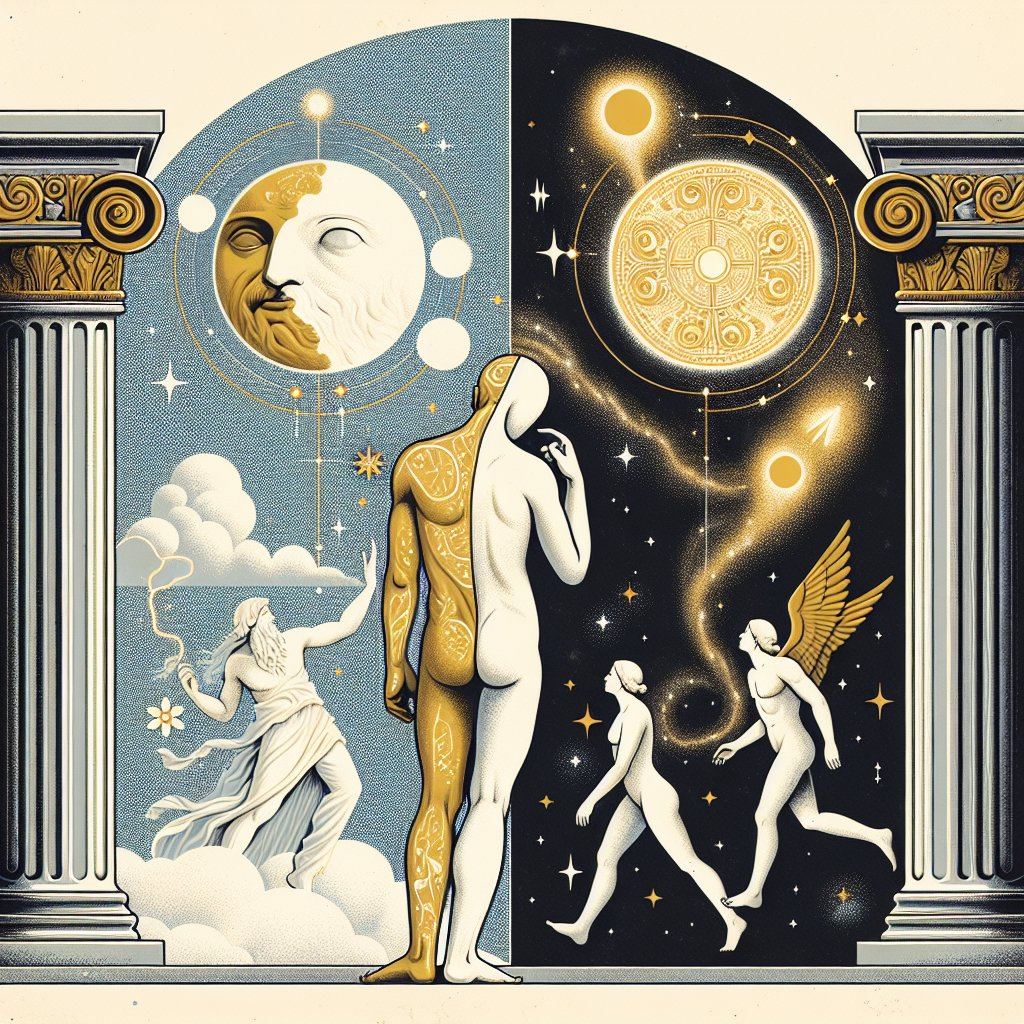

In [2]:
# Generate image for text below
display_image(illustrator('symbolically represent the following quote from The Apology by Plato: "Can a man believe in spiritual and divine agencies, and not in spirits or demigods? -He cannot."'))


Did ever man, Meletus, believe in the existence of human things, and
not of human beings?...I wish, men of Athens, that he would answer, and
not be always trying to get up an interruption. Did ever any man
believe in horsemanship, and not in horses? or in flute-playing, and
not in flute-players? No, my friend; I will answer to you and to the
court, as you refuse to answer for yourself. There is no man who ever
did. But now please to answer the next question: Can a man believe in
spiritual and divine agencies, and not in spirits or demigods? -He cannot.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


How lucky I am to have extracted that answer, by the assistance of the
court! But then you swear in the indictment that I teach and believe in
divine or spiritual agencies (new or old, no matter for that); at any
rate, I believe in spiritual agencies,—so you say and swear in the
affidavit; and yet if I believe in divine beings, how can I help
believing in spirits or demigods;—must I not? To be sure I must; and
therefore I may assume that your silence gives consent. Now what are
spirits or demigods? Are they not either gods or the sons of gods? -Certainly they are.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


But this is what I call the facetious riddle invented by you: the
demigods or spirits are gods, and you say first that I do not believe
in gods, and then again that I do believe in gods; that is, if I
believe in demigods. For if the demigods are the illegitimate sons of
gods, whether by the nymphs or by any other mothers, of whom they are
said to be the sons—what human being will ever believe that there are
no gods if they are the sons of gods? You might as well affirm the
existence of mules, and deny that of horses and asses. Such nonsense,
Meletus, could only have been intended by you to make trial of me. You
have put this into the indictment because you had nothing real of which
to accuse me. But no one who has a particle of understanding will ever
be convinced by you that the same men can believe in divine and
superhuman things, and yet not believe that there are gods and demigods
and heroes.

**Note:** Add your notes here.

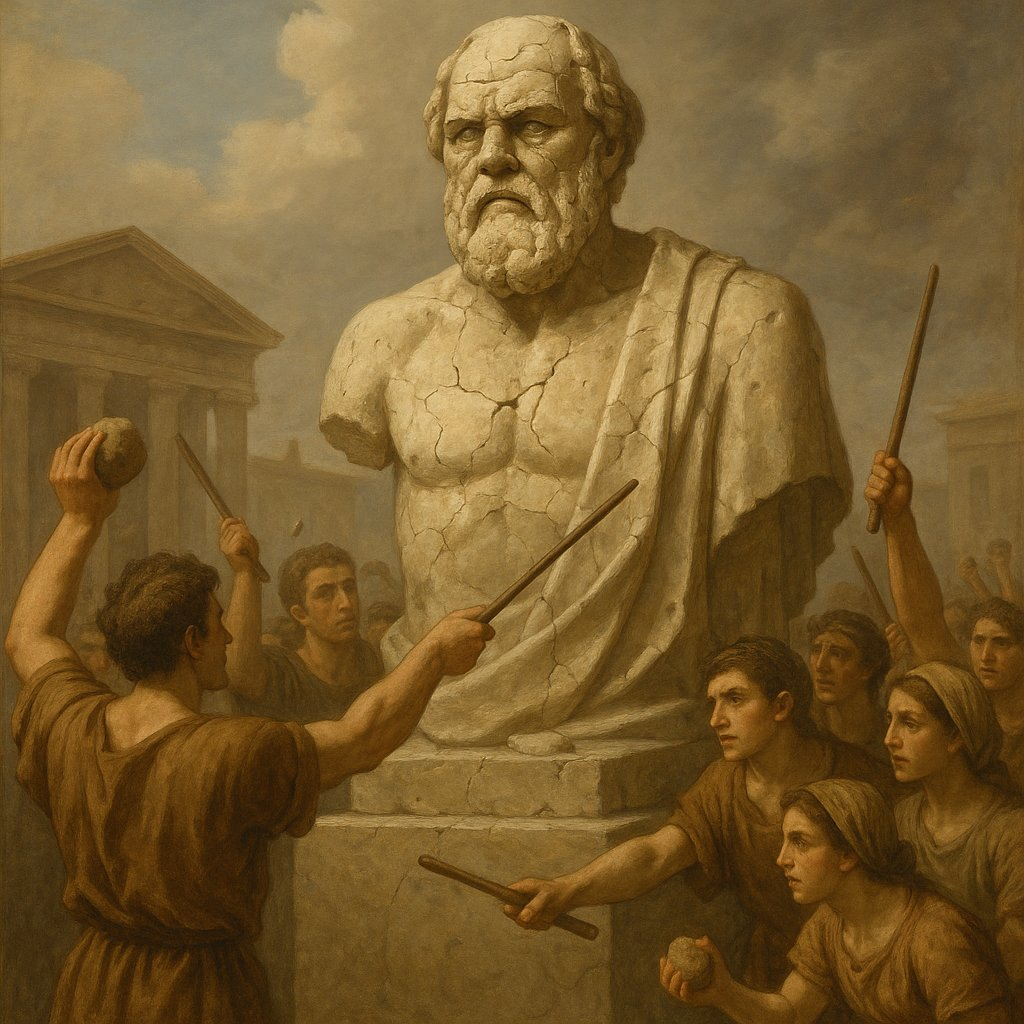

In [9]:
# Generate image for text below
display_image(illustrator('Create a image that represents the following quote by Socrates from the Apology by Plato:  "the envy and detraction of the world, which has been the death of many good men, and will probably be the death of many more;" The image should be a neoclassical painting depicting a once great, wise man represented as a once magnificent statue but has been cracked, broken, and weathered. Around the statue are people holding sticks and stones. The statue is large and towers over the crowd. They are using the sticks and stones to throw at the statue, symbolizing the attacks on the characters reputation. Do not depict any violence. Really emphasize the symbolism of the statue as a representation of the characters ideals and virtues being chipped away at from the envy and discontent from the crowd.'))


I have said enough in answer to the charge of Meletus: any elaborate
defence is unnecessary, but I know only too well how many are the
enmities which I have incurred, and this is what will be my destruction
if I am destroyed;—not Meletus, nor yet Anytus, but the envy and
detraction of the world, which has been the death of many good men, and
will probably be the death of many more; there is no danger of my being
the last of them.

**Note:** Add your notes here.

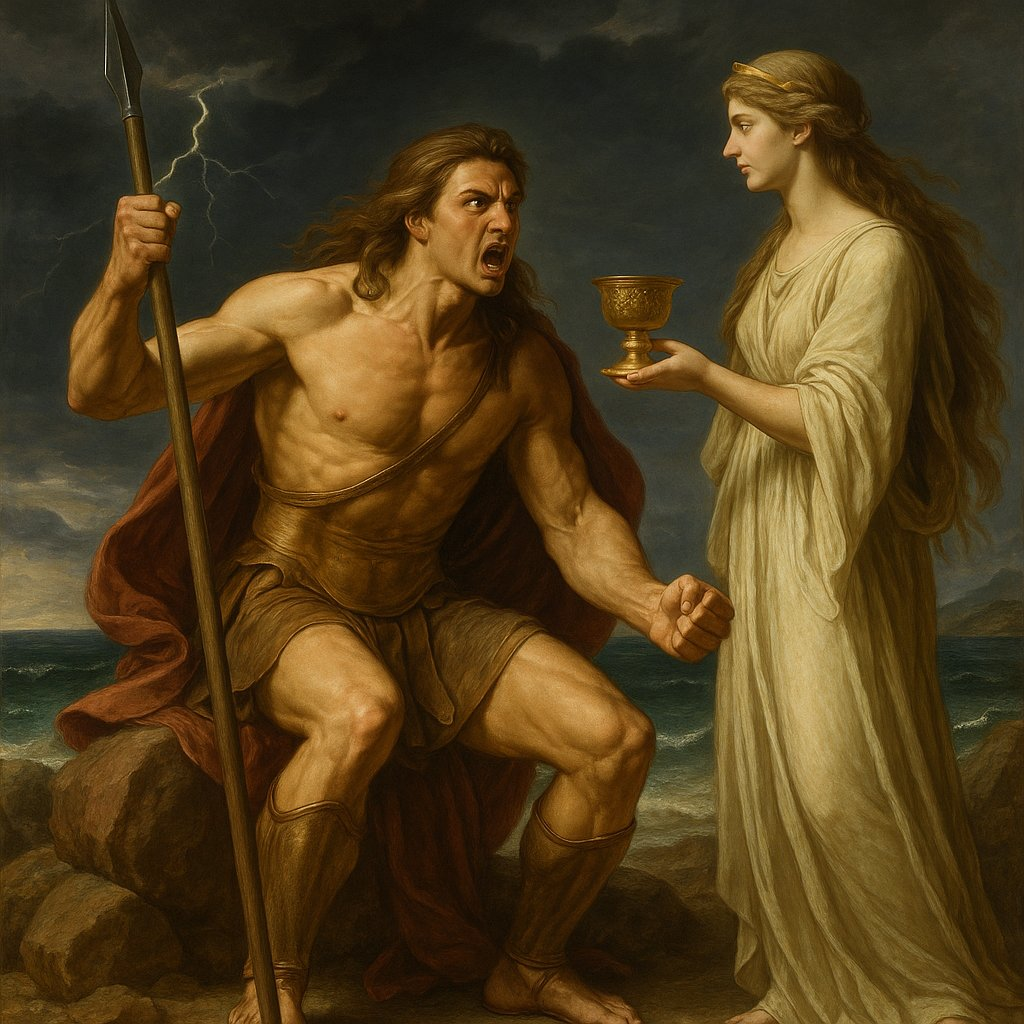

In [3]:
# Generate image for text below
display_image(illustrator('Create a neoclassical painting depicting Achilles being told by the goddess Thetis that he will die in battle. The scene is set on a rocky beach with the sea in the background. Achilles is depicted as a strong and handsome warrior, with long hair and a muscular build. He is wearing armor and holding a spear, and becomes enraged at the news. Thetis is depicted as a beautiful goddess, with flowing hair and a serene expression. She is holding a golden chalice and is dressed in flowing robes. The background features a stormy sky, with dark clouds and lightning, symbolizing the impending doom of Achilles. The overall mood of the painting is dramatic and intense, capturing the moment of revelation and the emotional turmoil of Achilles.'))


Some one will say: And are you not ashamed, Socrates, of a course of
life which is likely to bring you to an untimely end? To him I may
fairly answer: There you are mistaken: a man who is good for anything
ought not to calculate the chance of living or dying; he ought only to
consider whether in doing anything he is doing right or wrong—acting
the part of a good man or of a bad. Whereas, upon your view, the heroes
who fell at Troy were not good for much, and the son of Thetis above
all, who altogether despised danger in comparison with disgrace; and
when he was so eager to slay Hector, his goddess mother said to him,
that if he avenged his companion Patroclus, and slew Hector, he would
die himself—“Fate,” she said, in these or the like words, “waits for
you next after Hector;” he, receiving this warning, utterly despised
danger and death, and instead of fearing them, feared rather to live in
dishonour, and not to avenge his friend. “Let me die forthwith,” he
replies, “and be avenged of my enemy, rather than abide here by the
beaked ships, a laughing-stock and a burden of the earth.” Had Achilles
any thought of death and danger? For wherever a man’s place is, whether
the place which he has chosen or that in which he has been placed by a
commander, there he ought to remain in the hour of danger; he should
not think of death or of anything but of disgrace. And this, O men of
Athens, is a true saying.

**Note:** Add your notes here.

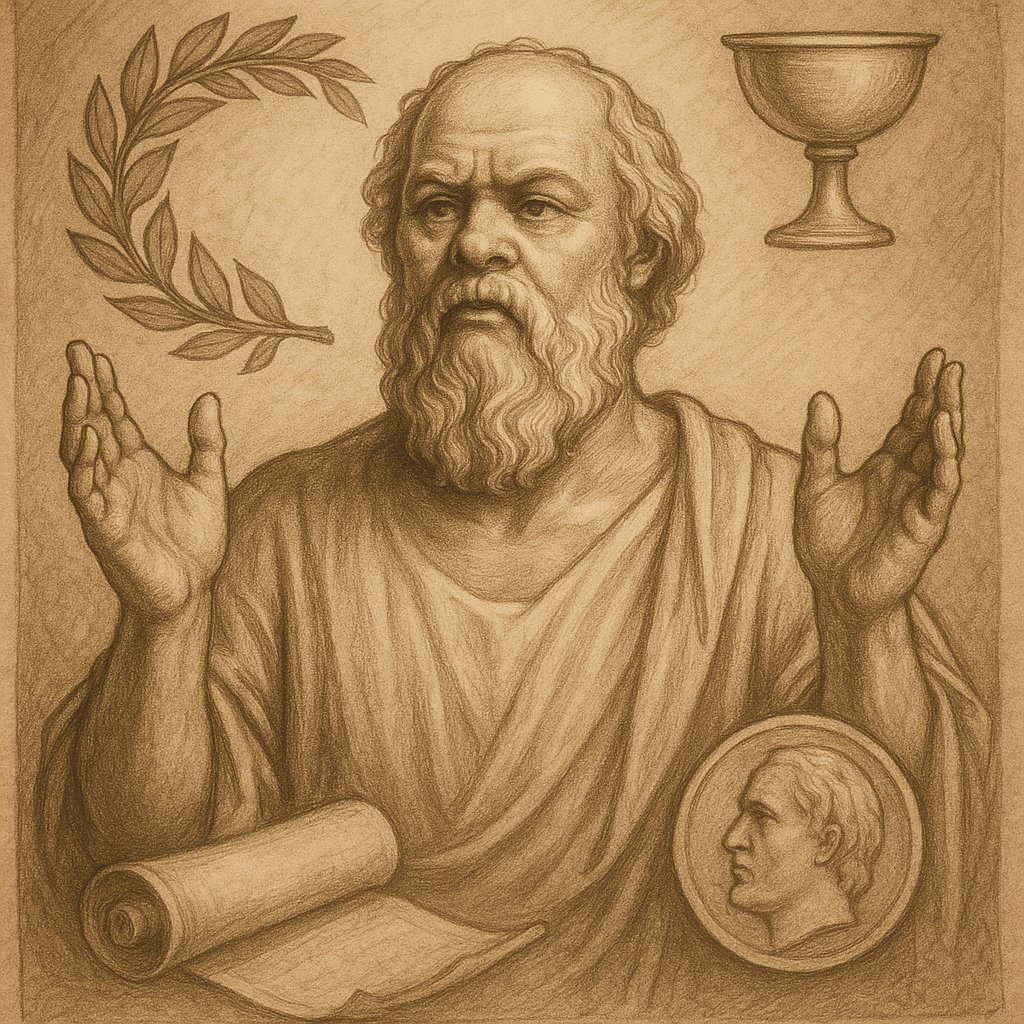

In [4]:
# Generate image for text below
display_image(illustrator('Depict the following quote from The Apology by Plato, Socrates says: "For know that this is the command of God; and I believe that no greater good has ever happened in the state than my service to the God. For I do nothing but go about persuading you all, old and young alike, not to take thought for your persons or your properties, but first and chiefly to care about the greatest improvement of the soul. I tell you that virtue is not given by money, but that from virtue comes money and every other good of man, public as well as private."  Show Socrates in the middle of the image with his hands raised in a gesture of teaching, surrounded by symbols representing his teachings. Incorporate elements such as a laurel wreath, a scroll, and a cup to symbolize wisdom, knowledge, and the pursuit of truth. Style the image to reflect the seriousness of Socrates mission to do as the gods command and his steadfastness in accomplishing that task, even if it takes his life.'))


Strange, indeed, would be my conduct, O men of Athens, if I who, when I
was ordered by the generals whom you chose to command me at Potidaea
and Amphipolis and Delium, remained where they placed me, like any
other man, facing death—if now, when, as I conceive and imagine, God
orders me to fulfil the philosopher’s mission of searching into myself
and other men, I were to desert my post through fear of death, or any
other fear; that would indeed be strange, and I might justly be
arraigned in court for denying the existence of the gods, if I
disobeyed the oracle because I was afraid of death, fancying that I was
wise when I was not wise. For the fear of death is indeed the pretence
of wisdom, and not real wisdom, being a pretence of knowing the
unknown; and no one knows whether death, which men in their fear
apprehend to be the greatest evil, may not be the greatest good. Is not
this ignorance of a disgraceful sort, the ignorance which is the
conceit that a man knows what he does not know? And in this respect
only I believe myself to differ from men in general, and may perhaps
claim to be wiser than they are:—that whereas I know but little of the
world below, I do not suppose that I know: but I do know that injustice
and disobedience to a better, whether God or man, is evil and
dishonourable, and I will never fear or avoid a possible good rather
than a certain evil. And therefore if you let me go now, and are not
convinced by Anytus, who said that since I had been prosecuted I must
be put to death; (or if not that I ought never to have been prosecuted
at all); and that if I escape now, your sons will all be utterly ruined
by listening to my words—if you say to me, Socrates, this time we will
not mind Anytus, and you shall be let off, but upon one condition, that
you are not to enquire and speculate in this way any more, and that if
you are caught doing so again you shall die;—if this was the condition
on which you let me go, I should reply: Men of Athens, I honour and
love you; but I shall obey God rather than you, and while I have life
and strength I shall never cease from the practice and teaching of
philosophy, exhorting any one whom I meet and saying to him after my
manner: You, my friend,—a citizen of the great and mighty and wise city
of Athens,—are you not ashamed of heaping up the greatest amount of
money and honour and reputation, and caring so little about wisdom and
truth and the greatest improvement of the soul, which you never regard
or heed at all? And if the person with whom I am arguing, says: Yes,
but I do care; then I do not leave him or let him go at once; but I
proceed to interrogate and examine and cross-examine him, and if I
think that he has no virtue in him, but only says that he has, I
reproach him with undervaluing the greater, and overvaluing the less.
And I shall repeat the same words to every one whom I meet, young and
old, citizen and alien, but especially to the citizens, inasmuch as
they are my brethren. For know that this is the command of God; and I
believe that no greater good has ever happened in the state than my
service to the God. For I do nothing but go about persuading you all,
old and young alike, not to take thought for your persons or your
properties, but first and chiefly to care about the greatest
improvement of the soul. I tell you that virtue is not given by money,
but that from virtue comes money and every other good of man, public as
well as private. This is my teaching, and if this is the doctrine which
corrupts the youth, I am a mischievous person. But if any one says that
this is not my teaching, he is speaking an untruth. Wherefore, O men of
Athens, I say to you, do as Anytus bids or not as Anytus bids, and
either acquit me or not; but whichever you do, understand that I shall
never alter my ways, not even if I have to die many times.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


Men of Athens, do not interrupt, but hear me; there was an
understanding between us that you should hear me to the end: I have
something more to say, at which you may be inclined to cry out; but I
believe that to hear me will be good for you, and therefore I beg that
you will not cry out. I would have you know, that if you kill such an
one as I am, you will injure yourselves more than you will injure me.
Nothing will injure me, not Meletus nor yet Anytus—they cannot, for a
bad man is not permitted to injure a better than himself. I do not deny
that Anytus may, perhaps, kill him, or drive him into exile, or deprive
him of civil rights; and he may imagine, and others may imagine, that
he is inflicting a great injury upon him: but there I do not agree. For
the evil of doing as he is doing—the evil of unjustly taking away the
life of another—is greater far.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


And now, Athenians, I am not going to argue for my own sake, as you may
think, but for yours, that you may not sin against the God by
condemning me, who am his gift to you. For if you kill me you will not
easily find a successor to me, who, if I may use such a ludicrous
figure of speech, am a sort of gadfly, given to the state by God; and
the state is a great and noble steed who is tardy in his motions owing
to his very size, and requires to be stirred into life. I am that
gadfly which God has attached to the state, and all day long and in all
places am always fastening upon you, arousing and persuading and
reproaching you. You will not easily find another like me, and
therefore I would advise you to spare me. I dare say that you may feel
out of temper (like a person who is suddenly awakened from sleep), and
you think that you might easily strike me dead as Anytus advises, and
then you would sleep on for the remainder of your lives, unless God in
his care of you sent you another gadfly. When I say that I am given to
you by God, the proof of my mission is this:—if I had been like other
men, I should not have neglected all my own concerns or patiently seen
the neglect of them during all these years, and have been doing yours,
coming to you individually like a father or elder brother, exhorting
you to regard virtue; such conduct, I say, would be unlike human
nature. If I had gained anything, or if my exhortations had been paid,
there would have been some sense in my doing so; but now, as you will
perceive, not even the impudence of my accusers dares to say that I
have ever exacted or sought pay of any one; of that they have no
witness. And I have a sufficient witness to the truth of what I say—my
poverty.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


Some one may wonder why I go about in private giving advice and busying
myself with the concerns of others, but do not venture to come forward
in public and advise the state. I will tell you why. You have heard me
speak at sundry times and in divers places of an oracle or sign which
comes to me, and is the divinity which Meletus ridicules in the
indictment. This sign, which is a kind of voice, first began to come to
me when I was a child; it always forbids but never commands me to do
anything which I am going to do. This is what deters me from being a
politician. And rightly, as I think. For I am certain, O men of Athens,
that if I had engaged in politics, I should have perished long ago, and
done no good either to you or to myself. And do not be offended at my
telling you the truth: for the truth is, that no man who goes to war
with you or any other multitude, honestly striving against the many
lawless and unrighteous deeds which are done in a state, will save his
life; he who will fight for the right, if he would live even for a
brief space, must have a private station and not a public one.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


I can give you convincing evidence of what I say, not words only, but
what you value far more—actions. Let me relate to you a passage of my
own life which will prove to you that I should never have yielded to
injustice from any fear of death, and that “as I should have refused to
yield” I must have died at once. I will tell you a tale of the courts,
not very interesting perhaps, but nevertheless true. The only office of
state which I ever held, O men of Athens, was that of senator: the
tribe Antiochis, which is my tribe, had the presidency at the trial of
the generals who had not taken up the bodies of the slain after the
battle of Arginusae; and you proposed to try them in a body, contrary
to law, as you all thought afterwards; but at the time I was the only
one of the Prytanes who was opposed to the illegality, and I gave my
vote against you; and when the orators threatened to impeach and arrest
me, and you called and shouted, I made up my mind that I would run the
risk, having law and justice with me, rather than take part in your
injustice because I feared imprisonment and death. This happened in the
days of the democracy. But when the oligarchy of the Thirty was in
power, they sent for me and four others into the rotunda, and bade us
bring Leon the Salaminian from Salamis, as they wanted to put him to
death. This was a specimen of the sort of commands which they were
always giving with the view of implicating as many as possible in their
crimes; and then I showed, not in word only but in deed, that, if I may
be allowed to use such an expression, I cared not a straw for death,
and that my great and only care was lest I should do an unrighteous or
unholy thing. For the strong arm of that oppressive power did not
frighten me into doing wrong; and when we came out of the rotunda the
other four went to Salamis and fetched Leon, but I went quietly home.
For which I might have lost my life, had not the power of the Thirty
shortly afterwards come to an end. And many will witness to my words.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


Now do you really imagine that I could have survived all these years,
if I had led a public life, supposing that like a good man I had always
maintained the right and had made justice, as I ought, the first thing?
No indeed, men of Athens, neither I nor any other man. But I have been
always the same in all my actions, public as well as private, and never
have I yielded any base compliance to those who are slanderously termed
my disciples, or to any other. Not that I have any regular disciples.
But if any one likes to come and hear me while I am pursuing my
mission, whether he be young or old, he is not excluded. Nor do I
converse only with those who pay; but any one, whether he be rich or
poor, may ask and answer me and listen to my words; and whether he
turns out to be a bad man or a good one, neither result can be justly
imputed to me; for I never taught or professed to teach him anything.
And if any one says that he has ever learned or heard anything from me
in private which all the world has not heard, let me tell you that he
is lying.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


But I shall be asked, Why do people delight in continually conversing
with you? I have told you already, Athenians, the whole truth about
this matter: they like to hear the cross-examination of the pretenders
to wisdom; there is amusement in it. Now this duty of cross-examining
other men has been imposed upon me by God; and has been signified to me
by oracles, visions, and in every way in which the will of divine power
was ever intimated to any one. This is true, O Athenians, or, if not
true, would be soon refuted. If I am or have been corrupting the youth,
those of them who are now grown up and have become sensible that I gave
them bad advice in the days of their youth should come forward as
accusers, and take their revenge; or if they do not like to come
themselves, some of their relatives, fathers, brothers, or other
kinsmen, should say what evil their families have suffered at my hands.
Now is their time. Many of them I see in the court. There is Crito, who
is of the same age and of the same deme with myself, and there is
Critobulus his son, whom I also see. Then again there is Lysanias of
Sphettus, who is the father of Aeschines—he is present; and also there
is Antiphon of Cephisus, who is the father of Epigenes; and there are
the brothers of several who have associated with me. There is
Nicostratus the son of Theosdotides, and the brother of Theodotus (now
Theodotus himself is dead, and therefore he, at any rate, will not seek
to stop him); and there is Paralus the son of Demodocus, who had a
brother Theages; and Adeimantus the son of Ariston, whose brother Plato
is present; and Aeantodorus, who is the brother of Apollodorus, whom I
also see. I might mention a great many others, some of whom Meletus
should have produced as witnesses in the course of his speech; and let
him still produce them, if he has forgotten—I will make way for him.
And let him say, if he has any testimony of the sort which he can
produce. Nay, Athenians, the very opposite is the truth. For all these
are ready to witness on behalf of the corrupter, of the injurer of
their kindred, as Meletus and Anytus call me; not the corrupted youth
only—there might have been a motive for that—but their uncorrupted
elder relatives. Why should they too support me with their testimony?
Why, indeed, except for the sake of truth and justice, and because they
know that I am speaking the truth, and that Meletus is a liar.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


Well, Athenians, this and the like of this is all the defence which I
have to offer. Yet a word more. Perhaps there may be some one who is
offended at me, when he calls to mind how he himself on a similar, or
even a less serious occasion, prayed and entreated the judges with many
tears, and how he produced his children in court, which was a moving
spectacle, together with a host of relations and friends; whereas I,
who am probably in danger of my life, will do none of these things. The
contrast may occur to his mind, and he may be set against me, and vote
in anger because he is displeased at me on this account. Now if there
be such a person among you,—mind, I do not say that there is,—to him I
may fairly reply: My friend, I am a man, and like other men, a creature
of flesh and blood, and not “of wood or stone,” as Homer says; and I
have a family, yes, and sons, O Athenians, three in number, one almost
a man, and two others who are still young; and yet I will not bring any
of them hither in order to petition you for an acquittal. And why not?
Not from any self-assertion or want of respect for you. Whether I am or
am not afraid of death is another question, of which I will not now
speak. But, having regard to public opinion, I feel that such conduct
would be discreditable to myself, and to you, and to the whole state.
One who has reached my years, and who has a name for wisdom, ought not
to demean himself. Whether this opinion of me be deserved or not, at
any rate the world has decided that Socrates is in some way superior to
other men. And if those among you who are said to be superior in wisdom
and courage, and any other virtue, demean themselves in this way, how
shameful is their conduct! I have seen men of reputation, when they
have been condemned, behaving in the strangest manner: they seemed to
fancy that they were going to suffer something dreadful if they died,
and that they could be immortal if you only allowed them to live; and I
think that such are a dishonour to the state, and that any stranger
coming in would have said of them that the most eminent men of Athens,
to whom the Athenians themselves give honour and command, are no better
than women. And I say that these things ought not to be done by those
of us who have a reputation; and if they are done, you ought not to
permit them; you ought rather to show that you are far more disposed to
condemn the man who gets up a doleful scene and makes the city
ridiculous, than him who holds his peace.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


But, setting aside the question of public opinion, there seems to be
something wrong in asking a favour of a judge, and thus procuring an
acquittal, instead of informing and convincing him. For his duty is,
not to make a present of justice, but to give judgment; and he has
sworn that he will judge according to the laws, and not according to
his own good pleasure; and we ought not to encourage you, nor should
you allow yourselves to be encouraged, in this habit of perjury—there
can be no piety in that. Do not then require me to do what I consider
dishonourable and impious and wrong, especially now, when I am being
tried for impiety on the indictment of Meletus. For if, O men of
Athens, by force of persuasion and entreaty I could overpower your
oaths, then I should be teaching you to believe that there are no gods,
and in defending should simply convict myself of the charge of not
believing in them. But that is not so—far otherwise. For I do believe
that there are gods, and in a sense higher than that in which any of my
accusers believe in them. And to you and to God I commit my cause, to
be determined by you as is best for you and me.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))



There are many reasons why I am not grieved, O men of Athens, at the
vote of condemnation. I expected it, and am only surprised that the
votes are so nearly equal; for I had thought that the majority against
me would have been far larger; but now, had thirty votes gone over to
the other side, I should have been acquitted. And I may say, I think,
that I have escaped Meletus. I may say more; for without the assistance
of Anytus and Lycon, any one may see that he would not have had a fifth
part of the votes, as the law requires, in which case he would have
incurred a fine of a thousand drachmae.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


And so he proposes death as the penalty. And what shall I propose on my
part, O men of Athens? Clearly that which is my due. And what is my
due? What return shall be made to the man who has never had the wit to
be idle during his whole life; but has been careless of what the many
care for—wealth, and family interests, and military offices, and
speaking in the assembly, and magistracies, and plots, and parties.
Reflecting that I was really too honest a man to be a politician and
live, I did not go where I could do no good to you or to myself; but
where I could do the greatest good privately to every one of you,
thither I went, and sought to persuade every man among you that he must
look to himself, and seek virtue and wisdom before he looks to his
private interests, and look to the state before he looks to the
interests of the state; and that this should be the order which he
observes in all his actions. What shall be done to such an one?
Doubtless some good thing, O men of Athens, if he has his reward; and
the good should be of a kind suitable to him. What would be a reward
suitable to a poor man who is your benefactor, and who desires leisure
that he may instruct you? There can be no reward so fitting as
maintenance in the Prytaneum, O men of Athens, a reward which he
deserves far more than the citizen who has won the prize at Olympia in
the horse or chariot race, whether the chariots were drawn by two
horses or by many. For I am in want, and he has enough; and he only
gives you the appearance of happiness, and I give you the reality. And
if I am to estimate the penalty fairly, I should say that maintenance
in the Prytaneum is the just return.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


Perhaps you think that I am braving you in what I am saying now, as in
what I said before about the tears and prayers. But this is not so. I
speak rather because I am convinced that I never intentionally wronged
any one, although I cannot convince you—the time has been too short; if
there were a law at Athens, as there is in other cities, that a capital
cause should not be decided in one day, then I believe that I should
have convinced you. But I cannot in a moment refute great slanders;
and, as I am convinced that I never wronged another, I will assuredly
not wrong myself. I will not say of myself that I deserve any evil, or
propose any penalty. Why should I? because I am afraid of the penalty
of death which Meletus proposes? When I do not know whether death is a
good or an evil, why should I propose a penalty which would certainly
be an evil? Shall I say imprisonment? And why should I live in prison,
and be the slave of the magistrates of the year—of the Eleven? Or shall
the penalty be a fine, and imprisonment until the fine is paid? There
is the same objection. I should have to lie in prison, for money I have
none, and cannot pay. And if I say exile (and this may possibly be the
penalty which you will affix), I must indeed be blinded by the love of
life, if I am so irrational as to expect that when you, who are my own
citizens, cannot endure my discourses and words, and have found them so
grievous and odious that you will have no more of them, others are
likely to endure me. No indeed, men of Athens, that is not very likely.
And what a life should I lead, at my age, wandering from city to city,
ever changing my place of exile, and always being driven out! For I am
quite sure that wherever I go, there, as here, the young men will flock
to me; and if I drive them away, their elders will drive me out at
their request; and if I let them come, their fathers and friends will
drive me out for their sakes.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


Some one will say: Yes, Socrates, but cannot you hold your tongue, and
then you may go into a foreign city, and no one will interfere with
you? Now I have great difficulty in making you understand my answer to
this. For if I tell you that to do as you say would be a disobedience
to the God, and therefore that I cannot hold my tongue, you will not
believe that I am serious; and if I say again that daily to discourse
about virtue, and of those other things about which you hear me
examining myself and others, is the greatest good of man, and that the
unexamined life is not worth living, you are still less likely to
believe me. Yet I say what is true, although a thing of which it is
hard for me to persuade you. Also, I have never been accustomed to
think that I deserve to suffer any harm. Had I money I might have
estimated the offence at what I was able to pay, and not have been much
the worse. But I have none, and therefore I must ask you to proportion
the fine to my means. Well, perhaps I could afford a mina, and
therefore I propose that penalty: Plato, Crito, Critobulus, and
Apollodorus, my friends here, bid me say thirty minæ, and they will be
the sureties. Let thirty minæ be the penalty; for which sum they will
be ample security to you.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))



Not much time will be gained, O Athenians, in return for the evil name
which you will get from the detractors of the city, who will say that
you killed Socrates, a wise man; for they will call me wise, even
although I am not wise, when they want to reproach you. If you had
waited a little while, your desire would have been fulfilled in the
course of nature. For I am far advanced in years, as you may perceive,
and not far from death. I am speaking now not to all of you, but only
to those who have condemned me to death. And I have another thing to
say to them: you think that I was convicted because I had no words of
the sort which would have procured my acquittal—I mean, if I had
thought fit to leave nothing undone or unsaid. Not so; the deficiency
which led to my conviction was not of words—certainly not. But I had
not the boldness or impudence or inclination to address you as you
would have liked me to do, weeping and wailing and lamenting, and
saying and doing many things which you have been accustomed to hear
from others, and which, as I maintain, are unworthy of me. I thought at
the time that I ought not to do anything common or mean when in danger:
nor do I now repent of the style of my defence; I would rather die
having spoken after my manner, than speak in your manner and live. For
neither in war nor yet at law ought I or any man to use every way of
escaping death. Often in battle there can be no doubt that if a man
will throw away his arms, and fall on his knees before his pursuers, he
may escape death; and in other dangers there are other ways of escaping
death, if a man is willing to say and do anything. The difficulty, my
friends, is not to avoid death, but to avoid unrighteousness; for that
runs faster than death. I am old and move slowly, and the slower runner
has overtaken me, and my accusers are keen and quick, and the faster
runner, who is unrighteousness, has overtaken them. And now I depart
hence condemned by you to suffer the penalty of death,—they too go
their ways condemned by the truth to suffer the penalty of villainy and
wrong; and I must abide by my award—let them abide by theirs. I suppose
that these things may be regarded as fated,—and I think that they are
well.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


And now, O men who have condemned me, I would fain prophesy to you; for
I am about to die, and in the hour of death men are gifted with
prophetic power. And I prophesy to you who are my murderers, that
immediately after my departure punishment far heavier than you have
inflicted on me will surely await you. Me you have killed because you
wanted to escape the accuser, and not to give an account of your lives.
But that will not be as you suppose: far otherwise. For I say that
there will be more accusers of you than there are now; accusers whom
hitherto I have restrained: and as they are younger they will be more
inconsiderate with you, and you will be more offended at them. If you
think that by killing men you can prevent some one from censuring your
evil lives, you are mistaken; that is not a way of escape which is
either possible or honourable; the easiest and the noblest way is not
to be disabling others, but to be improving yourselves. This is the
prophecy which I utter before my departure to the judges who have
condemned me.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


Friends, who would have acquitted me, I would like also to talk with
you about the thing which has come to pass, while the magistrates are
busy, and before I go to the place at which I must die. Stay then a
little, for we may as well talk with one another while there is time.
You are my friends, and I should like to show you the meaning of this
event which has happened to me. O my judges—for you I may truly call
judges—I should like to tell you of a wonderful circumstance. Hitherto
the divine faculty of which the internal oracle is the source has
constantly been in the habit of opposing me even about trifles, if I
was going to make a slip or error in any matter; and now as you see
there has come upon me that which may be thought, and is generally
believed to be, the last and worst evil. But the oracle made no sign of
opposition, either when I was leaving my house in the morning, or when
I was on my way to the court, or while I was speaking, at anything
which I was going to say; and yet I have often been stopped in the
middle of a speech, but now in nothing I either said or did touching
the matter in hand has the oracle opposed me. What do I take to be the
explanation of this silence? I will tell you. It is an intimation that
what has happened to me is a good, and that those of us who think that
death is an evil are in error. For the customary sign would surely have
opposed me had I been going to evil and not to good.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


Let us reflect in another way, and we shall see that there is great
reason to hope that death is a good; for one of two things—either death
is a state of nothingness and utter unconsciousness, or, as men say,
there is a change and migration of the soul from this world to another.
Now if you suppose that there is no consciousness, but a sleep like the
sleep of him who is undisturbed even by dreams, death will be an
unspeakable gain. For if a person were to select the night in which his
sleep was undisturbed even by dreams, and were to compare with this the
other days and nights of his life, and then were to tell us how many
days and nights he had passed in the course of his life better and more
pleasantly than this one, I think that any man, I will not say a
private man, but even the great king will not find many such days or
nights, when compared with the others. Now if death be of such a
nature, I say that to die is gain; for eternity is then only a single
night. But if death is the journey to another place, and there, as men
say, all the dead abide, what good, O my friends and judges, can be
greater than this? If indeed when the pilgrim arrives in the world
below, he is delivered from the professors of justice in this world,
and finds the true judges who are said to give judgment there, Minos
and Rhadamanthus and Aeacus and Triptolemus, and other sons of God who
were righteous in their own life, that pilgrimage will be worth making.
What would not a man give if he might converse with Orpheus and Musaeus
and Hesiod and Homer? Nay, if this be true, let me die again and again.
I myself, too, shall have a wonderful interest in there meeting and
conversing with Palamedes, and Ajax the son of Telamon, and any other
ancient hero who has suffered death through an unjust judgment; and
there will be no small pleasure, as I think, in comparing my own
sufferings with theirs. Above all, I shall then be able to continue my
search into true and false knowledge; as in this world, so also in the
next; and I shall find out who is wise, and who pretends to be wise,
and is not. What would not a man give, O judges, to be able to examine
the leader of the great Trojan expedition; or Odysseus or Sisyphus, or
numberless others, men and women too! What infinite delight would there
be in conversing with them and asking them questions! In another world
they do not put a man to death for asking questions: assuredly not. For
besides being happier than we are, they will be immortal, if what is
said is true.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


Wherefore, O judges, be of good cheer about death, and know of a
certainty, that no evil can happen to a good man, either in life or
after death. He and his are not neglected by the gods; nor has my own
approaching end happened by mere chance. But I see clearly that the
time had arrived when it was better for me to die and be released from
trouble; wherefore the oracle gave no sign. For which reason, also, I
am not angry with my condemners, or with my accusers; they have done me
no harm, although they did not mean to do me any good; and for this I
may gently blame them.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


Still I have a favour to ask of them. When my sons are grown up, I
would ask you, O my friends, to punish them; and I would have you
trouble them, as I have troubled you, if they seem to care about
riches, or anything, more than about virtue; or if they pretend to be
something when they are really nothing,—then reprove them, as I have
reproved you, for not caring about that for which they ought to care,
and thinking that they are something when they are really nothing. And
if you do this, both I and my sons will have received justice at your
hands.

**Note:** Add your notes here.

In [ ]:
# Generate image for text below
display_image(illustrator(''))


The hour of departure has arrived, and we go our ways—I to die, and you
to live. Which is better God only knows.

**Note:** Add your notes here.